In [3]:
!pip install wordcloud

In [ ]:
# 필요 라이브러리 import

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random


In [ ]:
# 열 이름을 붙여 csv파일 읽기
df = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding = 'latin', names = ['target', 'ids', 'date', 'flag', 'user', 'text'])

In [ ]:
# pos, neg데이터 개수 각각 800,000개를 문자열로 변환
pos = df[df.target == 4].loc[:, ['text']].to_string()
neg = df[df.target == 0].loc[:, ['text']].to_string()

In [ ]:
# 단어 단위로 쪼개 500,000개씩 랜덤 샘플링 진행
random.seed(42)
pos_sampling = " ".join(random.sample(pos.split(), 500000))
neg_sampling = " ".join(random.sample(neg.split(), 500000))

In [ ]:
# 샘플링한 단어들로 WordCloud 생성
pos_cloud = WordCloud(max_words = 200, background_color = 'white').generate(pos_sampling)
neg_cloud = WordCloud(max_words = 200, background_color = 'white').generate(neg_sampling)

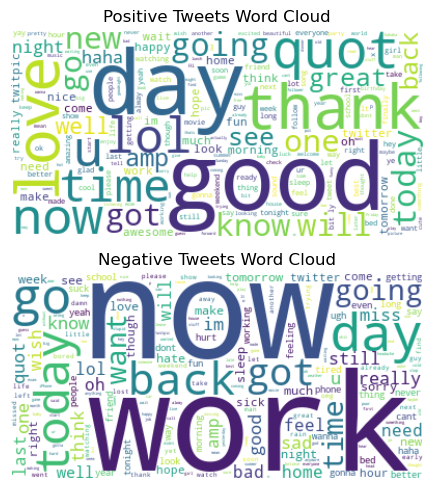

In [ ]:
# 생성한 WordCloud 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 5))

axes[0].imshow(pos_cloud, interpolation="bilinear")
axes[0].set_title("Positive Tweets Word Cloud")
axes[0].axis("off")

axes[1].imshow(neg_cloud, interpolation="bilinear")
axes[1].set_title("Negative Tweets Word Cloud")
axes[1].axis("off")

fig.tight_layout()
plt.show()